<a href="https://colab.research.google.com/github/abhirajtiwari/rock_paper_scissor/blob/master/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock Paper Scissor using deeplearning
This notebook has code for implementing a deeplearning model to identify rock, paper or scissor for a classic game.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
print(tf.__version__)

2.2.0


So I plan on doing transfer learning by training a classifier on the minst SIGNS dataset and then using that classifier to train further on the rock paper scissor data base.

I'm gonna try a custom cnn architecture, some standard cnn architecture and some cnn that is light like mobile net to finally deploy it as an app.

#### Extracting the dataset

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-07-01 16:12:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 74.125.128.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   135MB/s    in 1.4s    

2020-07-01 16:13:00 (135 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-07-01 16:13:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘

In [7]:
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

## Loading the dataset

Shape: (300, 300, 4)


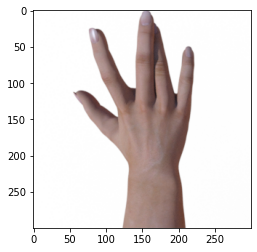

In [11]:
root = "/tmp/"

example = np.asarray(Image.open(root + "rps/paper/paper01-000.png"))
print("Shape: " + str(example.shape))
plt.imshow(example)

In [13]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_generator = train_gen.flow_from_directory(root + "rps", batch_size=32, target_size=(150, 150), color_mode='grayscale', shuffle=True, class_mode='categorical')

Found 2520 images belonging to 3 classes.


In [14]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = train_gen.flow_from_directory(root + "rps-test-set", batch_size=32, target_size=(150, 150), color_mode='grayscale', shuffle=True, class_mode='categorical')

Found 372 images belonging to 3 classes.


## Custom Model

In [40]:
cust_model = tf.keras.Sequential()
cust_model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 1)))
cust_model.add(layers.MaxPool2D((2, 2)))
cust_model.add(layers.Dropout(0.4))
cust_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cust_model.add(layers.MaxPool2D((2, 2)))
cust_model.add(layers.Flatten())
cust_model.add(layers.Dropout(0.8))
cust_model.add(layers.Dense(64, activation='relu'))
cust_model.add(layers.Dropout(0.6))
cust_model.add(layers.Dense(3, activation='softmax'))

cust_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])
cust_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 39200)             0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 39200)           

In [41]:
cust_history = cust_model.fit(train_generator, epochs=25, verbose=1, validation_data=test_generator)

Epoch 1/25
79/79 [==============================] - 9s 115ms/step - loss: 1.1697 - acc: 0.3329 - val_loss: 1.0987 - val_acc: 0.3333
Epoch 2/25
79/79 [==============================] - 9s 115ms/step - loss: 1.0956 - acc: 0.3591 - val_loss: 1.0973 - val_acc: 0.3360
Epoch 3/25
79/79 [==============================] - 9s 115ms/step - loss: 1.0134 - acc: 0.4397 - val_loss: 0.8857 - val_acc: 0.6344
Epoch 4/25
79/79 [==============================] - 9s 116ms/step - loss: 0.7730 - acc: 0.6361 - val_loss: 0.6945 - val_acc: 0.8253
Epoch 5/25
79/79 [==============================] - 9s 116ms/step - loss: 0.6430 - acc: 0.6980 - val_loss: 0.5865 - val_acc: 0.8387
Epoch 6/25
79/79 [==============================] - 9s 115ms/step - loss: 0.5522 - acc: 0.7623 - val_loss: 0.4767 - val_acc: 0.8387
Epoch 7/25
79/79 [==============================] - 9s 113ms/step - loss: 0.5022 - acc: 0.7766 - val_loss: 0.4224 - val_acc: 0.8548
Epoch 8/25
79/79 [==============================] - 9s 115ms/step - loss: 0.

In [50]:
def plot_history(hist):
  # summarize history for accuracy
  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('model acc')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

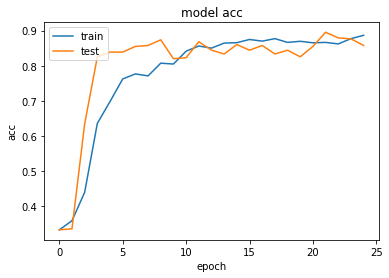

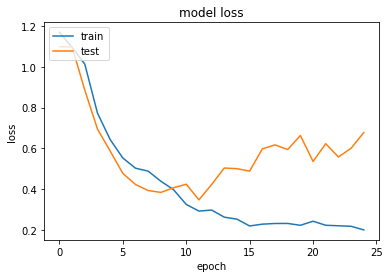

In [51]:
plot_history(cust_history)

## Transfer learning

In [42]:
train_gen_mobnet = train_gen.flow_from_directory(root + "rps", batch_size=32, target_size=(150, 150), color_mode='rgb', shuffle=True, class_mode='categorical')
test_gen_mobnet = train_gen.flow_from_directory(root + "rps-test-set", batch_size=32, target_size=(150, 150), color_mode='rgb', shuffle=True, class_mode='categorical') 

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [47]:
mob_v2_base = tf.keras.applications.MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')
mob_v2_base.trainable=False
mob_v2_rps = tf.keras.Sequential([
                                  mob_v2_base,
                                  layers.GlobalAveragePooling2D(),
                                  layers.Dropout(0.4),
                                  layers.Dense(3, activation='softmax')
                                ])
mob_v2_rps.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 10, 10, 1280)      2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [48]:
mob_v2_rps.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [49]:
mobnet_history = mob_v2_rps.fit(train_gen_mobnet, epochs=20, verbose=1, validation_data=test_gen_mobnet)

Epoch 1/20
79/79 [==============================] - 11s 139ms/step - loss: 0.3616 - acc: 0.8544 - val_loss: 0.3592 - val_acc: 0.8468
Epoch 2/20
79/79 [==============================] - 10s 129ms/step - loss: 0.0739 - acc: 0.9802 - val_loss: 0.2661 - val_acc: 0.9167
Epoch 3/20
79/79 [==============================] - 10s 125ms/step - loss: 0.0431 - acc: 0.9905 - val_loss: 0.1690 - val_acc: 0.9489
Epoch 4/20
79/79 [==============================] - 10s 128ms/step - loss: 0.0258 - acc: 0.9960 - val_loss: 0.3168 - val_acc: 0.8871
Epoch 5/20
79/79 [==============================] - 10s 126ms/step - loss: 0.0216 - acc: 0.9968 - val_loss: 0.2332 - val_acc: 0.9328
Epoch 6/20
79/79 [==============================] - 10s 124ms/step - loss: 0.0190 - acc: 0.9960 - val_loss: 0.2187 - val_acc: 0.9247
Epoch 7/20
79/79 [==============================] - 10s 127ms/step - loss: 0.0120 - acc: 0.9992 - val_loss: 0.2259 - val_acc: 0.9247
Epoch 8/20
79/79 [==============================] - 10s 125ms/step - 

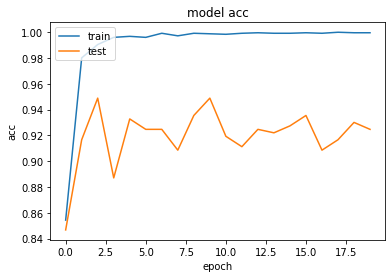

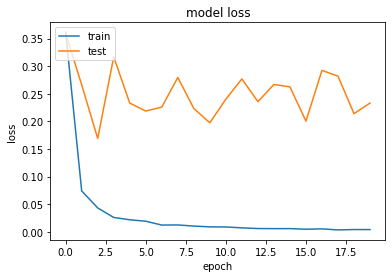

In [52]:
plot_history(mobnet_history)